# Weights are subjective and often need adjustment
There are tools in `pyemu` to assist with weight adjustment to balance the contribution of various groups.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pyemu
import os, shutil
import sys
sys.path.append('..')

### Copy down the base  files for the freyberg model with K and R parameters

In [3]:
import freyberg_setup
freyberg_setup.setup_pest_kr()
working_dir = freyberg_setup.WORKING_DIR_KR
pst_name = freyberg_setup.PST_NAME_KR


['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'inschek', 'inschek.exe', 'kzone.ref', 'mf2005', 'mf2005.exe', 'mfnwt', 'mp6', 'mp6.exe', 'mpath.in', 'pest++.exe', 'pestchek', 'pestchek.exe', 'pestpp', 'potobs_group.csv', 'Process_output.py', 'really_noisy_heads.txt', 'run_true_model.py', 'strt.ref', 'sweep', 'sweep.exe', 'tempchek', 'tempchek.exe', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_kr
FloPy is using the

/Users/mnfienen/Documents/GIT/pyemu/pyemu/pst/pst_utils.py:419: UserWarning: pst_from_io_files has moved to pyemu.helpers and is also now avaiable as a Pst class method (Pst.from_io_files())
  "now avaiable as a Pst class method (Pst.from_io_files())")


run():./inschek freyberg.travel.ins freyberg.travel
run():./inschek vol.dat.ins vol.dat
run():./pestchek freyberg_kr.pst
run():./pestpp freyberg_kr.init.pst


### We can read in the base PST file and do a quick run


In [4]:
inpst = pyemu.Pst('freyberg.pst')

In [5]:
inpst.control_data.noptmax

0

In [6]:
pyemu.helpers.run("pestpp {0}".format(pst_name))


run():./pestpp freyberg_kr.pst


In [7]:
inpst.phi

98.1802598698

In [8]:
inpst.phi_components

{'flux_cal': 0.0,
 'flux_fore': 0.0,
 'head_cal': 98.1802598698,
 'head_fore': 0.0,
 'travel_fore': 0.0}

In [9]:
inpst.phi_components_normalized

{'flux_cal': 0.0,
 'flux_fore': 0.0,
 'head_cal': 1.0,
 'head_fore': 0.0,
 'travel_fore': 0.0}

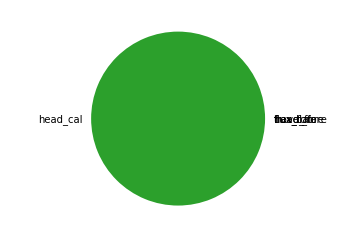

In [10]:
starting_components = inpst.phi_components_normalized
plt.axis('equal')
plt.pie([float(v) for v in starting_components.values()], labels=[k for k in starting_components.keys()]);

In [11]:
groups = ['flux_cal', 'flux_fore', 'head_fore', 'head_cal', 'travel_fore']

In [12]:
new_portions = [0.4,0,0,0.6,0.0]

In [13]:
sum(new_portions)

1.0

In [14]:
newcomponents = dict(zip(groups,[i*inpst.phi for i in new_portions]))

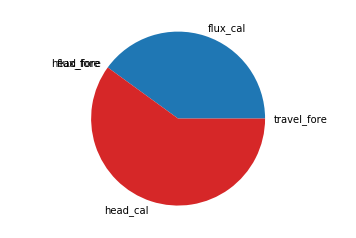

In [15]:
plt.axis('equal')
plt.pie([float(v) for v in newcomponents.values()], labels=[k for k in newcomponents.keys()]);

In [16]:
newcomponents

{'flux_cal': 39.27210394792,
 'flux_fore': 0.0,
 'head_cal': 58.908155921879995,
 'head_fore': 0.0,
 'travel_fore': 0.0}

## Make a new copy of the PST file for output

In [17]:
outpst = pyemu.Pst('freyberg.pst')

In [18]:
outpst.observation_data.head(14)

,obsnme,obsval,weight,obgnme
obsnme,,,,
cr03c16,cr03c16,22.18672,1.0,head_cal
cr03c10,cr03c10,24.08591,1.0,head_cal
cr04c9,cr04c9,22.33339,1.0,head_cal
cr10c2,cr10c2,31.83430,1.0,head_cal
cr14c11,cr14c11,17.72841,1.0,head_cal
cr16c17,cr16c17,16.56648,1.0,head_cal
cr22c11,cr22c11,18.28594,1.0,head_cal
cr23c16,cr23c16,15.20820,1.0,head_cal
cr25c5,cr25c5,24.24294,1.0,head_cal


In [19]:
outpst.phi_components

{'flux_cal': 0.0,
 'flux_fore': 0.0,
 'head_cal': 98.1802598698,
 'head_fore': 0.0,
 'travel_fore': 0.0}

In [20]:
outpst.adjust_weights_by_list('rivflux_cal',1.0)
outpst.phi_components

{'flux_cal': 810676.941376,
 'flux_fore': 0.0,
 'head_cal': 98.1802598698,
 'head_fore': 0.0,
 'travel_fore': 0.0}

In [21]:
outpst.adjust_weights(obsgrp_dict=newcomponents)
outpst.phi_components

{'flux_cal': 39.27210394792,
 'flux_fore': 0.0,
 'head_cal': 58.90815592188001,
 'head_fore': 0.0,
 'travel_fore': 0.0}

In [22]:
outpst.observation_data.head(14)

,obsnme,obsval,weight,obgnme
obsnme,,,,
cr03c16,cr03c16,22.18672,0.774597,head_cal
cr03c10,cr03c10,24.08591,0.774597,head_cal
cr04c9,cr04c9,22.33339,0.774597,head_cal
cr10c2,cr10c2,31.83430,0.774597,head_cal
cr14c11,cr14c11,17.72841,0.774597,head_cal
cr16c17,cr16c17,16.56648,0.774597,head_cal
cr22c11,cr22c11,18.28594,0.774597,head_cal
cr23c16,cr23c16,15.20820,0.774597,head_cal
cr25c5,cr25c5,24.24294,0.774597,head_cal


In [23]:
outpst.phi

98.18025986980001

In [24]:
outpst.write('freyberg_reweighted.pst')

## Relating weights to observation noise

Weights can initially be thought of as the reciprocal of observation noise, as characterized by standard deviation of the observation: 
$w=\frac{1}{\sigma}$

After adjustment, it's a good idea to calculate the equivalent $\sigma$ for each observation to determine whether it remains realistic. In this case:

In [25]:
#initial weight for head
w=1
sig=1/w
sig

1.0

In [26]:
#new weight for head
w=.774597
sig=1/w
sig

1.2909938974718467